## Informative Visualizations about Malaria

In [1]:
import pandas as pd

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [23]:
import matplotlib.pyplot as plt

In [73]:
import plotly

In [126]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv"
malaria_deaths = pd.read_csv(url)

In [3]:
malaria_deaths.head()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [8]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv"
malaria_deaths_age = pd.read_csv(url, index_col=0)
malaria_deaths_age.head()

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [62]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv"
malaria_inc = pd.read_csv(url)
malaria_inc.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


### Malaria Death Rates
This visualization shows the age-standardized death rates of Malaria per 100,000 in 1990. 

In [117]:
for year in malaria_deaths.Year.unique():
    malaria_deaths_year = malaria_deaths[malaria_deaths.Year==year]
    malaria_deaths_year['text'] = malaria_deaths_year['Entity']+str(malaria_deaths_year['Entity'])
    data_one_year = dict(type='choropleth',
                        locations = malaria_deaths_year.Code,
                        z=malaria_deaths_year['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'],
                        colorscale = scl,
                        colorbar= dict(title="Deaths per 100,000",tickvals=[0,50,100,150,200],ticktext=['0','50','100','150','200']))
    data_slider.append(data_one_year)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [118]:
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1990)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)


	
##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

In [119]:
layout = dict(sliders=sliders)

In [120]:
fig = dict(data=data_slider, layout=layout) 
plotly.offline.iplot(fig)

In [139]:
malaria_deaths_grouped = malaria_deaths.groupby('Year').sum()
malaria_deaths_grouped = malaria_deaths_grouped.assign(rolling = malaria_deaths_grouped.rolling(window=3, min_periods=1).mean())

In [141]:
malaria_deaths_grouped = malaria_deaths_grouped.reset_index()

Text(0.5, 1.0, 'Annual Deaths from Malaria from 1990 to 2016 with rolling windows')

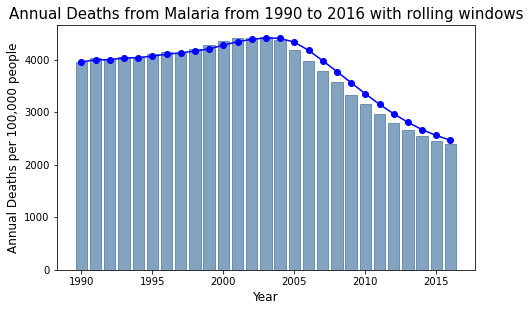

In [167]:
plt.figure(figsize=(7.5,4.5))
plt.bar(malaria_deaths_grouped.Year, 
        malaria_deaths_grouped['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'],
        edgecolor = (0.2, 0.4, 0.6, 0.6),
        color=(0.2, 0.4, 0.6, 0.6))
plt.plot(malaria_deaths_grouped.Year, malaria_deaths_grouped['rolling'], color='blue', marker='o')
plt.ylabel('Annual Deaths per 100,000 people', fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title('Annual Deaths from Malaria from 1990 to 2016 with rolling windows', fontsize=15)

### Malaria Death Rates by Age Group
As we can see from this stacked barplot, most of the deaths derived from children under 5 years old. The number of deaths from children under 5 is higher than the number of deaths from all the other age groups. The overall number of deaths reached the peak in 2003.

In [44]:
malaria_deaths_age_under5 = malaria_deaths_age[malaria_deaths_age.age_group=='Under 5'].groupby('year').sum()
malaria_deaths_age_5_14 = malaria_deaths_age[malaria_deaths_age.age_group=='5-14'].groupby('year').sum()
malaria_deaths_age_15_49 = malaria_deaths_age[malaria_deaths_age.age_group=='15-49'].groupby('year').sum()
malaria_deaths_age_50_69 = malaria_deaths_age[malaria_deaths_age.age_group=='50-69'].groupby('year').sum()
malaria_deaths_age_70 = malaria_deaths_age[malaria_deaths_age.age_group=='70 or older'].groupby('year').sum()

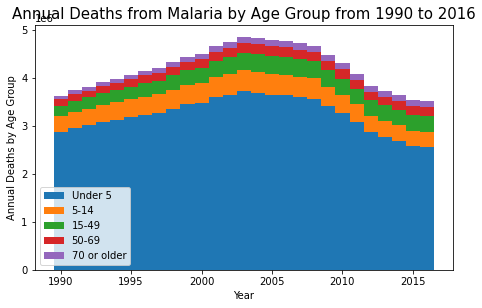

In [165]:
plt.figure(figsize=(7.5,4.5))
p1 = plt.bar(malaria_deaths_age_under5.index, malaria_deaths_age_under5.deaths, width = 1)
p2 = plt.bar(malaria_deaths_age_5_14.index, malaria_deaths_age_5_14.deaths, bottom = malaria_deaths_age_under5.deaths, width = 1)
p3 = plt.bar(malaria_deaths_age_15_49.index, malaria_deaths_age_15_49.deaths, bottom = malaria_deaths_age_under5.deaths+malaria_deaths_age_5_14.deaths, width = 1)
p4 = plt.bar(malaria_deaths_age_50_69.index, malaria_deaths_age_50_69.deaths, 
        bottom = malaria_deaths_age_under5.deaths+malaria_deaths_age_5_14.deaths+malaria_deaths_age_15_49.deaths, width = 1)
p5 = plt.bar(malaria_deaths_age_70.index, malaria_deaths_age_70.deaths, 
        bottom = malaria_deaths_age_under5.deaths+malaria_deaths_age_5_14.deaths+malaria_deaths_age_15_49.deaths+malaria_deaths_age_50_69.deaths, width = 1)
plt.title('Annual Deaths from Malaria by Age Group from 1990 to 2016', fontsize=15)
plt.ylabel('Annual Deaths by Age Group')
plt.xlabel('Year')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Under 5', '5-14', '15-49', '50-69', '70 or older'))

### Malaria Incidence

In [121]:
malaria_inc_2000 = malaria_inc[malaria_inc.Year==2000]
malaria_inc_2000.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
4,Algeria,DZA,2000,0.037746
8,Angola,AGO,2000,315.600000
12,Argentina,ARG,2000,2.500000
16,Azerbaijan,AZE,2000,17.900000


Data Source: https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-13